In [1]:
import os
import yaml

from thesis.tools.cli.utilities import load_gaze_data
from thesis.optim import filters
from thesis.optim.metrics import *

import pandas as pd
import numpy as np

from tqdm import tqdm

/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-

Deep_eye
conv_unit_1
stride_unit_1


2020-12-01 02:16:23.306 WARNING tensorflow: From /Users/Anton/Documents/git/thesis/Thesis-Code/thesis/deepeye/deepeye.py:74: average_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.average_pooling2d instead.


Last_conv1x1_1
conv_unit_2
stride_unit_2
Last_conv1x1_2
atrous_unit_1


2020-12-01 02:16:24.403 WARNING tensorflow: From /Users/Anton/Documents/git/thesis/Thesis-Code/thesis/deepeye/deepeye.py:109: max_pooling2d (from tensorflow.python.layers.pooling) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.max_pooling2d instead.


conv_unit_3
atrous_unit_2
conv_unit_4
Last_conv1x1_3


2020-12-01 02:16:25.762 WARNING tensorflow: From /Users/Anton/anaconda3/envs/iaml/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
2020-12-01 02:16:25.763 INFO    tensorflow: Restoring parameters from /Users/Anton/Documents/git/thesis/Thesis-Code/thesis/deepeye/models/default.ckpt


Model restored.


In [2]:
types = {
    'blur': 'Destructive',
    'noise': 'Additive',
    'combo': 'Combined'
}

type_map = {k: types[v] for k, v in {
    'bilateral_filter': 'blur',
    'gaussian_filter': 'blur',
    'mean_filter': 'blur',
    'median_filter': 'blur',
    'non_local_means': 'blur',
    'uniform_noise': 'noise',
    'gaussian_noise': 'noise',
    'cauchy_noise': 'noise',
    'laplacian_noise': 'noise',
    'snow': 'noise',
    'salt_and_pepper': 'noise',
    'super_filter': 'combo',
    'super_filter_reverse': 'combo'
}.items()}

filter_name_map = {
    'bilateral_filter': 'Bilateral filter',
    'gaussian_filter': 'Gaussian filter',
    'mean_filter': 'Mean filter',
    'median_filter': 'Median filter',
    'non_local_means': 'Non-local means',
    'uniform_noise': 'Uniform noise',
    'gaussian_noise': 'Gaussian noise',
    'cauchy_noise': 'Cauchy noise',
    'laplacian_noise': 'Laplacian noise',
    'snow': 'Snow noise',
    'salt_and_pepper': 'Salt-and-pepper noise',
    'super_filter': 'Comb',
    'super_filter_reverse': 'Comb-reverse'
}

pretty_name_map = {
    'gradient_entropy_iris_source': 'Entropy of source (iris) - gradient method',
    'gradient_entropy_iris_filtered': 'Entropy of result (iris) - gradient method',
    'gradient_mutual_information_iris': 'Mutual information (iris) - gradient method',
    'gabor_entropy_iris_source_1.0x': 'Entropy of source (iris) - gabor method (3px)',
    'gabor_entropy_iris_source_0.5x': 'Entropy of source (iris) - gabor method (6px)',
    'gabor_entropy_iris_source_0.25x': 'Entropy of source (iris) - gabor method (12px)',
    'gabor_entropy_iris_source_0.125x': 'Entropy of source (iris) - gabor method (24px)',
    'gabor_entropy_iris_source_0.0625x': 'Entropy of source (iris) - gabor method (48px)',
    'gabor_entropy_iris_filtered_1.0x': 'Entropy of result (iris) - gabor method (3px)',
    'gabor_entropy_iris_filtered_0.5x': 'Entropy of result (iris) - gabor method (6px)',
    'gabor_entropy_iris_filtered_0.25x': 'Entropy of result (iris) - gabor method (12px)',
    'gabor_entropy_iris_filtered_0.125x': 'Entropy of result (iris) - gabor method (24px)',
    'gabor_entropy_iris_filtered_0.0625x': 'Entropy of result (iris) - gabor method (48px)',
    'gabor_mutual_information_iris_1.0x': 'Mutual information (iris) - gabor method (3px)',
    'gabor_mutual_information_iris_0.5x': 'Mutual information (iris) - gabor method (6px)',
    'gabor_mutual_information_iris_0.25x': 'Mutual information (iris) - gabor method (12px)',
    'gabor_mutual_information_iris_0.125x': 'Mutual information (iris) - gabor method (24px)',
    'gabor_mutual_information_iris_0.0625x': 'Mutual information (iris) - gabor method (48px)',
    'gradient_entropy_image_source': 'Entropy of source (image) - gradient method',
    'gradient_entropy_image_filtered': 'Entropy of result (image) - gradient method',
    'gradient_mutual_information_image': 'Mutual information (image) - gradient method',
    'gabor_entropy_image_source_1.0x': 'Entropy of source (image) - gabor method (3px)',
    'gabor_entropy_image_source_0.5x': 'Entropy of source (image) - gabor method (6px)',
    'gabor_entropy_image_source_0.25x': 'Entropy of source (image) - gabor method (12px)',
    'gabor_entropy_image_source_0.125x': 'Entropy of source (image) - gabor method (24px)',
    'gabor_entropy_image_source_0.0625x': 'Entropy of source (image) - gabor method (48px)',
    'gabor_entropy_image_filtered_1.0x': 'Entropy of result (image) - gabor method (3px)',
    'gabor_entropy_image_filtered_0.5x': 'Entropy of result (image) - gabor method (6px)',
    'gabor_entropy_image_filtered_0.25x': 'Entropy of result (image) - gabor method (12px)',
    'gabor_entropy_image_filtered_0.125x': 'Entropy of result (image) - gabor method (24px)',
    'gabor_entropy_image_filtered_0.0625x': 'Entropy of result (image) - gabor method (48px)',
    'gabor_mutual_information_image_1.0x': 'Mutual information (image) - gabor method (3px)',
    'gabor_mutual_information_image_0.5x': 'Mutual information (image) - gabor method (6px)',
    'gabor_mutual_information_image_0.25x': 'Mutual information (image) - gabor method (12px)',
    'gabor_mutual_information_image_0.125x': 'Mutual information (image) - gabor method (24px)',
    'gabor_mutual_information_image_0.0625x': 'Mutual information (image) - gabor method (48px)',
    'iris_code_similarity': 'Iris code similarity',
    'image_normalized_similarity': 'Image similarity',
    'gaze_angle_error_source': 'Gaze error source',
    'gaze_angle_error_filtered': 'Gaze error result',
    'gaze_relative_error': 'Gaze error relative',
    'pupil_distance_else_pixel_error_source': 'Pupil pixel distance error of source - ELSE method',
    'pupil_distance_else_pixel_error_filtered': 'Pupil pixel distance error of result - ELSE method',
    'pupil_distance_deep_eye_pixel_error_source': 'Pupil pixel distance error of source - DeepEye method',
    'pupil_distance_deep_eye_pixel_error_filtered': 'Pupil pixel distance error of result - DeepEye method',
    'pupil_relative_error_else': 'Pupil pixel distance relative - ELSE method',
    'pupil_relative_error_deep_eye': 'Pupil pixel distance relative - DeepEye method',
    'filter': 'Filter',
    'k': 'Kernel size',
    'h': '$h$',
    'sigma': 'Variance',
    'scale': 'Variance',
    'intensity': 'Intensity',
    'density': 'Density',
    'sigma_s': 'Spatial variance',
    'sigma_c': 'Colour variance',

}

In [3]:
gaze_sets = ('far_home', 'mor_home', 'anton', 'maja', 'jakob')
base_path = '/Users/Anton/MEGA/Data/thesis/gaze'
gaze_paths = [os.path.join(base_path, g) for g in gaze_sets]
datasets = load_gaze_data(gaze_paths)

87.0
87.0
48.409
48.409
48.409


In [4]:
import matplotlib.pyplot as plt

from styles import *
from names import *

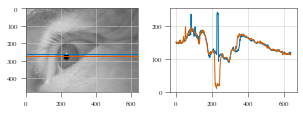

In [44]:
img = datasets[0].test_samples[5].image

fig, ax = plt.subplots(1, 2, figsize=set_size('thesis', subplots=(1, 2), ratio=golden_ratio))
ax[0].imshow(img, cmap='gray')
xp = 259
xpp = 270
ax[0].hlines(xp, 0, 640, colors='b')
ax[0].hlines(xpp, 0, 640, colors='r')

x = np.arange(0, img.shape[1], 1)
y = img[xp, :]
y2 = img[xpp, :]

ax[1].plot(x, y)
ax[1].plot(x, y2, color='r')

ax[0].set_xlim(0, 640)
ax[0].set_ylim(480, 0)

fig.savefig('out/1dimage.pdf', bbox_inches='tight', dpi=500)

In [7]:
base = 'data/iris'
fnames = ['1x', '1.5x', '2x', '5x', '10x']
configs = []
for name in fnames:
    with open(os.path.join(base, f'{name}.yaml')) as f:
        configs.append(yaml.safe_load(f))

In [8]:
def test_filter(f_func, args):
    logger = Logger()
    me = GazeAccuracy()

    for dset in tqdm(datasets):
        for sample in dset.test_samples:
            filtered = f_func(sample.image, **args)
            me.log(logger, dset.model, sample, filtered)
    
    return logger

In [10]:
l = test_filter(lambda x: x, {})

100%|██████████| 5/5 [02:23<00:00, 28.61s/it]


In [11]:
l.means()

[1.231023100385268, 1.231023100385268]

In [77]:
res = []
for c, s in zip(configs, fnames):
    print(f'Config: {s}')
    cr = []
    for k, v in list(c['filters'].items()):
        print(f'Filter: {k}')
        cr.append(test_filter(getattr(filters, k), v))
    res.append(cr)    

  0%|          | 0/5 [00:00<?, ?it/s]

Config: 1x
Filter: bilateral_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: mean_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: median_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: non_local_means


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: uniform_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: cauchy_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: laplacian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: snow


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: salt_and_pepper


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter_reverse


  0%|          | 0/5 [00:00<?, ?it/s]

Config: 1.5x
Filter: bilateral_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: mean_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: median_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: non_local_means


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: uniform_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: cauchy_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: laplacian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: snow


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: salt_and_pepper


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter_reverse


  0%|          | 0/5 [00:00<?, ?it/s]

Config: 2x
Filter: bilateral_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: mean_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: median_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: non_local_means


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: uniform_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: cauchy_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: laplacian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: snow


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: salt_and_pepper


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter_reverse


  0%|          | 0/5 [00:00<?, ?it/s]

Config: 5x
Filter: bilateral_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: mean_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: median_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: non_local_means


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: uniform_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: cauchy_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: laplacian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: snow


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: salt_and_pepper


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter_reverse


  0%|          | 0/5 [00:00<?, ?it/s]

Config: 10x
Filter: bilateral_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: gaussian_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: mean_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: median_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: non_local_means


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: uniform_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: cauchy_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: laplacian_noise


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: snow


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: salt_and_pepper


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter


  0%|          | 0/5 [00:00<?, ?it/s]

Filter: super_filter_reverse


100%|██████████| 5/5 [02:49<00:00, 33.98s/it]


In [82]:
res[0][0].data

defaultdict(list,
            {'gaze_angle_error_source': [1.5284351345142,
              1.6832871846221973,
              0.8348415053910917,
              0.4896783465679689,
              2.176911000139518,
              0.43540527823521025,
              0.7627973754593882,
              1.9587724705900655,
              0.3082273841502467,
              0.7518231491450095,
              0.5709344533518771,
              1.0948474949444542,
              0.8917425429739658,
              1.960096930378965,
              1.345786959578976,
              2.331866862314477,
              1.2413968413251715,
              0.34982679631502817,
              0.8530552423484309,
              2.866305633100495,
              1.89115322727904,
              1.8949621810279316,
              1.200233403728558,
              0.46997555947109715,
              0.8845997048336979,
              2.425232590502991,
              2.2372989393151155,
              1.473875322366921,
             

In [90]:
rows = []
for c, fn, r in zip(configs, fnames, res):
    for (name, params), rl in zip(c['filters'].items(), r):
        df = pd.DataFrame(rl.data)
        df['filter'] = name
        df['Filter'] = filter_name_map[name]
        df['scale_group'] = fn
        rows.append(df)

frame = pd.concat(rows)
frame.to_pickle('data/Gaze.pkl')
frame

,gaze_angle_error_source,gaze_angle_error_filtered,filter,Filter,scale_group
0,1.528435,0.876621,bilateral_filter,Bilateral filter,1x
1,1.683287,3.377988,bilateral_filter,Bilateral filter,1x
2,0.834842,2.074067,bilateral_filter,Bilateral filter,1x
3,0.489678,2.120429,bilateral_filter,Bilateral filter,1x
4,2.176911,1.718885,bilateral_filter,Bilateral filter,1x
...,...,...,...,...,...
245,0.655202,47.769411,super_filter_reverse,Comb-reverse,10x
246,0.288310,3.494390,super_filter_reverse,Comb-reverse,10x
247,1.644007,11.559635,super_filter_reverse,Comb-reverse,10x
248,0.819984,1.433844,super_filter_reverse,Comb-reverse,10x
